## Sentiment Analysis on Tweets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv('text_with_col.csv')

In [2]:
df.head()

,label,id,Date,query,name,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.columns

Index(['label', 'id', 'Date', 'query', 'name', 'Text'], dtype='object')

In [4]:
tweet_df = df[['label','Text']]
print(tweet_df.shape)
tweet_df.head(5)

(1600000, 2)


,label,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweet_df['Text']

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

def Cleaner(tweet_df):
    tweet_df['Text'] = tweet_df['Text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
    tweet_df['Text'] = tweet_df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    tweet_df['Text'] = tweet_df['Text'].str.replace(r'[^\w\s]+', '')
    print(tweet_df)

Cleaner(tweet_df)

<ipython-input-5-91bb200f1093>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['Text'] = tweet_df['Text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
<ipython-input-5-91bb200f1093>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['Text'] = tweet_df['Text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
<ipython-input-5-91bb200f1093>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

         label                                               Text
0            0  switchfoot  Awww thats bummer You shoulda got ...
1            0  upset cant update Facebook texting it might cr...
2            0  Kenichan I dived many times ball Managed save ...
3            0                   whole body feels itchy like fire
4            0  nationwideclass no behaving all im mad here I ...
...        ...                                                ...
1599995      4       Just woke up Having school best feeling ever
1599996      4  TheWDBcom  Very cool hear old Walt interviews ...
1599997      4                Are ready MoJo Makeover Ask details
1599998      4  Happy 38th Birthday boo alll time Tupac Amaru ...
1599999      4  happy charitytuesday theNSPCC SparksCharity Sp...

[1600000 rows x 2 columns]


<ipython-input-5-91bb200f1093>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['Text'] = tweet_df['Text'].str.replace(r'[^\w\s]+', '')


In [6]:
tweet_df.head()

,label,Text
0,0,switchfoot Awww thats bummer You shoulda got ...
1,0,upset cant update Facebook texting it might cr...
2,0,Kenichan I dived many times ball Managed save ...
3,0,whole body feels itchy like fire
4,0,nationwideclass no behaving all im mad here I ...


In [7]:
tweet_df["label"].value_counts()

0    800000
4    800000
Name: label, dtype: int64

In [8]:
sentiment_label = tweet_df.label.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Int64Index([0, 4], dtype='int64'))

In [9]:
tweet = tweet_df.Text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [10]:
print(tokenizer.word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
print(tweet[0])
print(encoded_docs[0])

switchfoot  Awww thats bummer You shoulda got David Carr Third Day it D
[401, 49, 1192, 15, 3562, 13, 756, 1871, 4, 14, 423]


In [12]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0  401   49 1192   15 3562   13  756
 1871 

In [13]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           24516832  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 24,533,483
Trainable params: 24,533,483
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
history = model.fit(padded_sequence[700000:900000],sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
5000/5000 [==============================] - 1161s 232ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 1.3267e-06 - val_accuracy: 1.0000
Epoch 2/5
5000/5000 [==============================] - 1213s 243ms/step - loss: 1.0649e-06 - accuracy: 1.0000 - val_loss: 7.7841e-08 - val_accuracy: 1.0000
Epoch 3/5
5000/5000 [==============================] - 1214s 243ms/step - loss: 8.9767e-08 - accuracy: 1.0000 - val_loss: 5.1206e-09 - val_accuracy: 1.0000
Epoch 4/5
5000/5000 [==============================] - 1228s 246ms/step - loss: 8.9319e-09 - accuracy: 1.0000 - val_loss: 4.2633e-10 - val_accuracy: 1.0000
Epoch 5/5
5000/5000 [==============================] - 1241s 248ms/step - loss: 1.3724e-09 - accuracy: 1.0000 - val_loss: 8.5329e-11 - val_accuracy: 1.0000


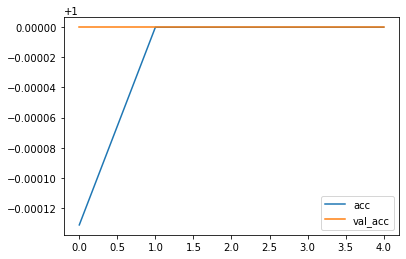

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

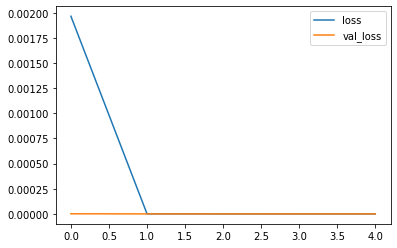

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [60]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[0][prediction])

In [61]:
test_sentence1 = "wow my journey on this flight is great."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  0
Predicted label:  0


In [22]:
df2 = pd.read_csv('teslaTweet.csv')

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,21,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
df2.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [70]:
df2_tweet = df2[['date','tweet']]
df2_tweet.head()

,date,tweet
0,2020-12-31,Tesla Drivers Can Now Use A Fart Noise As A Ho...
1,2020-12-31,Can somebody send me a link to the tesla truck
2,2020-12-31,"Tesla?s car horns can now fart, bark, or do wh..."
3,2020-12-31,Inversiones 2020: el peso argentino fue el gra...
4,2020-12-31,"Tesla?s car horns can now fart, bark, or do wh..."


In [71]:
def Cleaner(tweet_df):
    tweet_df['tweet'] = tweet_df['tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
    tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    tweet_df['tweet'] = tweet_df['tweet'].str.replace(r'[^\w\s]+', '')
    print(tweet_df)

Cleaner(df2_tweet)


<ipython-input-71-1e4abab30db5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['tweet'] = tweet_df['tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
<ipython-input-71-1e4abab30db5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['tweet'] = tweet_df['tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
<ipython-input-71-1e4abab30db5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

             date                                              tweet
0      2020-12-31   Tesla Drivers Can Now Use A Fart Noise As A Horn
1      2020-12-31                 Can somebody send link tesla truck
2      2020-12-31  Teslas car horns fart bark whatever else want ...
3      2020-12-31  Inversiones 2020 el peso argentino fue el gran...
4      2020-12-31  Teslas car horns fart bark whatever else want ...
...           ...                                                ...
62697  2020-06-25  Vdeo mostra como Tesla Roadster atinge 100 Kmh...
62698  2020-06-25  Tesla plans battery facility California threat...
62699  2020-06-25  See rendering upcoming Tesla Roadster speed 60...
62700  2020-06-25  Tesla gave workers permission stay home termin...
62701  2020-06-25  GONZOz Latest Conspiracy Thirst Trap Tesla The...

[62702 rows x 2 columns]


<ipython-input-71-1e4abab30db5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['tweet'] = tweet_df['tweet'].str.replace(r'[^\w\s]+', '')


In [72]:
df2_tweet.head()

,date,tweet
0,2020-12-31,Tesla Drivers Can Now Use A Fart Noise As A Horn
1,2020-12-31,Can somebody send link tesla truck
2,2020-12-31,Teslas car horns fart bark whatever else want ...
3,2020-12-31,Inversiones 2020 el peso argentino fue el gran...
4,2020-12-31,Teslas car horns fart bark whatever else want ...


In [68]:
tweet = df2_tweet.tweet.values
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
df2_tweet['label'] = model.predict(df2_tweet['tweet'])

AttributeError: 'int' object has no attribute 'lower'

In [77]:
tweet = df2_tweet.tweet.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [79]:
df2_tweet['label'] = model.predict(pad_sequences)

ValueError: Failed to find data adapter that can handle input: <class 'function'>, <class 'NoneType'>

In [75]:
df2_tweet.head()

,date,tweet,label
0,2020-12-31,Tesla Drivers Can Now Use A Fart Noise As A Horn,8.557538e-11
1,2020-12-31,Can somebody send link tesla truck,8.553654e-11
2,2020-12-31,Teslas car horns fart bark whatever else want ...,8.538870e-11
3,2020-12-31,Inversiones 2020 el peso argentino fue el gran...,8.528567e-11
4,2020-12-31,Teslas car horns fart bark whatever else want ...,8.538870e-11


In [4]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

NameError: name 'vocab_size' is not defined

In [3]:
import numpy as np
import pandas as pd
from numpy import hstack

df = pd.read_excel('PosNeg.xlsx')

df.columns

Index(['Unnamed: 0', 'Date', 'neg', 'neu', 'pos', 'compound', 'Unnamed: 0.1',
       'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Differ', 'X2',
       'Y2', 'Mid value', 'nextDayMid'],
      dtype='object')